In [18]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_validate

# Helper Functions

These functions train a model on your data and use cross validation to determine the average negative mean squared error. You do not have to edit these! However, it might make sense to add new helper functions here.

In [19]:
def scoreLinear(X, y):
    """Trains a linear regression model and evaluates it with 3-fold cross validation.
  
    Parameters: 
    X (array): Training data of shape (n_samples, n_features)
    y (array): Target values of shape (n_samples,)
  
    Returns: 
    Float: average score of the model after cross validation
    """
    regr = linear_model.LinearRegression()
    scores = cross_val_score(regr, X, y, cv=3, scoring='neg_mean_squared_error')
    return scores.mean()

In [460]:
def scoreBoosting(X, y):
    """Trains a gradient boosting model and evaluates it with 3-fold cross validation.
  
    Parameters: 
    X (array): Training data of shape (n_samples, n_features)
    y (array): Target values of shape (n_samples,)
  
    Returns: 
    Float: average score of the model after cross validation
    """
    clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0, loss='squared_error')
    # clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0, loss='ls') # older versions
    
    scores = cross_val_score(clf, X, np.ravel(y), cv=3, scoring='neg_mean_squared_error')

    return scores.mean()

In [461]:
def dataframeToXy(df, predict_column, feature_columns):
    """Convert the dataframe to a format usable for the ML algorithms"""
    X = df[feature_columns].values.reshape(-1, df[feature_columns].shape[1]) # all features
    y = df[[predict_column]].values.reshape(-1, 1) # values to predict
    return X, y

In [462]:
def runScoring(df, predict_column, feature_columns):
    """This runs both algorithms to determine the scores for all given features in the dataset.
    
    Parameters: 
    df (dataframe): dataframe with Score and features
    predict_column: name of the value to predict, e.g. 'Score'
    feature_columns: list of all column names that are to be used as features
  
    Returns: 
    linear: negative mean squared error of linear regression
    boost: negative mean squared error of boosting algorithm
    """
    X, y = dataframeToXy(df, predict_column, feature_columns)
    boost = scoreBoosting(X, y)
    linear = scoreLinear(X, y)
    return linear, boost

In [463]:
def runScoringSimple(df, predict_column):
    """Alternative to function above, this takes all the columns in the 
    dataframe as features except the single column which is used for the score.
    """
    all_feature_columns = list(df.columns)
    all_feature_columns.remove(predict_column)
    return runScoring(df, predict_column, all_feature_columns)

In [464]:
def createBaselineRandom(df, predict_column):
    """creates random features and returns the average score after 20 rounds"""
    np.random.seed(0)
    baseline = df[['Score']].copy()
    averageLinearScore = 0
    averageBoostingScore = 0
    rounds = 20
    for i in range(rounds):
        baseline['feature1'] = np.random.randint(0, 100, df.shape[0])
        baseline['feature2'] = np.random.randint(0, 100, df.shape[0])
        baseline['feature3'] = np.random.randint(0, 100, df.shape[0])
        lin, boost = runScoring(baseline, predict_column, ['feature1', 'feature2', 'feature3'])
        averageLinearScore += lin / rounds
        averageBoostingScore += boost / rounds
    print(f'linear   : {averageLinearScore}')
    print(f'boosting : {averageBoostingScore}')

# Load Data

Recommended: Make sure you have a column named 'Score', preferably as the first column, while the name of the municipality is the index. It is fine to use your previous notebook from assignment 1 to export the data to a .csv or excel and simply import the file here, you do not have to show the code for that. Your initial dataframe should look somewhat like the one below, with more features of course.

In [465]:
df_ranking_1_csv = pd.read_csv('./data/ranking/ranking_1.csv')

df_baseline_all_features = df_ranking_1_csv.copy()
df_baseline_all_features = df_baseline_all_features[['Score', 'BFS_NR']]

df_all_features_assignement1 = pd.read_csv('./data/assignement1/all_features.csv')

df_baseline_all_features = df_baseline_all_features.merge(df_all_features_assignement1, on='BFS_NR', how='left')
df_baseline_all_features = df_baseline_all_features.set_index(['GEBIET_NAME','BFS_NR'])


df_baseline_all_features.drop(columns=[ 'NET_ASSETS', 'ACCIDENTS', 'INVALID_VOTES', 'BURGLARY'], inplace=True)
df_baseline_all_features


,,Score,STUDENTS,SEARCH_MATCHES,DISTANCE_NEXT_STOP,SHEEPS,TAX,POPULATION,BIRTH_RATE,EMPTY_APARTMENTS,RESTAURANTS,WIKI_PAGEVIEWS
GEBIET_NAME,BFS_NR,,,,,,,,,,,
Truttikon,41,100.000000,13,348,255,36,3744,452,2.2,0.00,2.2,668.0
Volken,43,91.580681,15,371,176,223,3744,392,7.8,0.59,2.6,726.0
Flaach,28,88.265552,49,617,244,0,3744,1439,11.9,1.92,2.8,980.0
Dällikon,84,87.039425,126,532,222,17,3744,4291,9.8,0.21,1.4,223.0
Berg a.I.,23,84.092796,13,358,198,0,4997,591,6.7,0.34,3.4,524.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Urdorf,250,40.436249,303,1212,183,0,3744,10211,11.0,0.96,1.4,893.0
Küsnacht,154,32.018501,173,1386,209,71,7715,14794,10.8,2.83,1.6,354.0
Unterengstringen,249,28.877321,95,461,211,6,3794,4103,10.8,1.44,1.5,720.0


These are the features that were used to create the original ranking in Assignment 1:  
- Netto Einkommen
- Anzahl Einbrüche
- Anzahl Unfälle


# Get a first baseline for your model with random values

In [466]:
# This code creates a baseline for your model, using random features
createBaselineRandom(df_baseline_all_features, 'Score')

linear   : -288.1250890420052
boosting : -325.6166063129615


**WARNING**: This uses the same dataframe for both the linear model and the boosting model. In your code you will want to use different ones for the different models. Your goal is to get both of these scores to as close as 0 as possible and most likely you will need to do different steps for linear regression and for gradient boosting and therefore have different features. 

# Get a second baseline by using all features you have

In [467]:
# this assumes we have a dataframe with a column named Score and all other columns are features.
# You might have to change this code if your dataframe looks different.
linear, boost = runScoringSimple(df_baseline_all_features, 'Score')
print(f'linear   : {linear:10.8f}')
print(f'boosting : {boost:10.8f}')

linear   : -273.40007575
boosting : -281.88062842


In [468]:
print(df_baseline_all_features.columns)

Index(['Score', 'STUDENTS', 'SEARCH_MATCHES', 'DISTANCE_NEXT_STOP', 'SHEEPS',
       'TAX', 'POPULATION', 'BIRTH_RATE', 'EMPTY_APARTMENTS', 'RESTAURANTS',
       'WIKI_PAGEVIEWS'],
      dtype='object')


# Extend your features and add something of a geographic nature

Take the features you have loaded above and potentially extend it with the data from the gemeindeporträts 2021. Now you can extend this with some kind of geographic information. This can be pretty much anything that uses coordinates, height, relative position to other features etc. Try to find something reasonable that might help you, but don't worry if you find out during your feature engineering that it is not helpful, you are not required to use the feature for your final model.

In [469]:

gemeindePortrait  = pd.read_excel( './data/provided/GemeindePortraits2021.xlsx', header=5)
gemeindePortrait = gemeindePortrait.rename(columns={'Gemeindecode': 'BFS_NR'})
geodata_df = pd.read_csv('./data/geofeatures.csv')
# Rename bfs_id to BFS_NR
geodata_df = geodata_df.rename(columns={'bfs_id': 'BFS_NR'})

# Replace cells with value : 'X' or nan to 0
geodata_df = geodata_df.replace(np.nan, 0)
gemeindePortrait = gemeindePortrait.replace('X', 0)

all_features_extended = df_baseline_all_features.copy().merge(gemeindePortrait, on='BFS_NR', how='left')
all_features_extended = all_features_extended.merge(geodata_df, on='BFS_NR', how='left')

# remove: Gemeindename, BFS_NR
all_features_extended = all_features_extended.set_index(['Gemeindename', 'BFS_NR'])

linear_extended, boost_extended = runScoringSimple(all_features_extended, 'Score')

print(f'linear   : {format(linear_extended, ".2f")}')
print(f'boosting : {boost_extended}')

linear   : -1792355016468262144.00
boosting : -286.0207811842916


/var/folders/b3/44hvr6kx27dc7jx6br0c21d80000gn/T/ipykernel_97689/3961234769.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gemeindePortrait = gemeindePortrait.replace('X', 0)


# Do your own feature engineering here

Your goal is to find the right features to get both scores as close to 0 as possible. Add more columns to your dataframe through feature engineering and choose which ones of those you will use for the machine learning models. Use the methods discussed in class to improve your results even further.

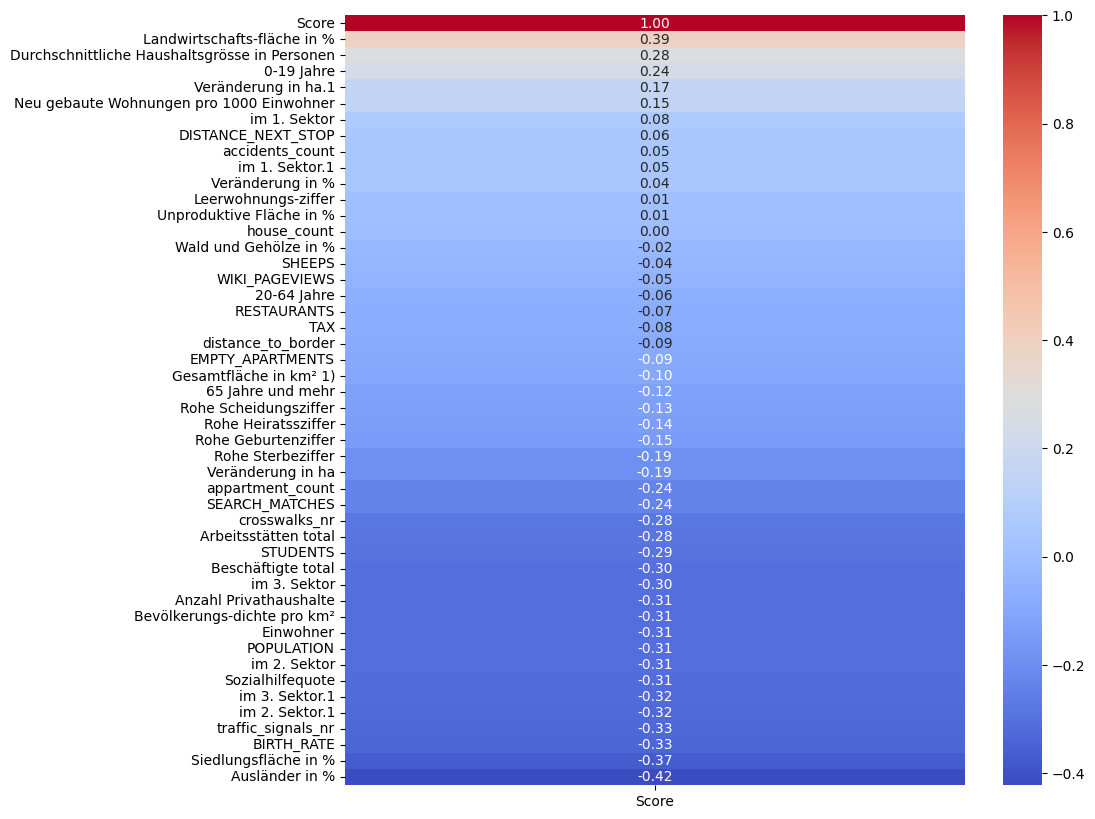

In [470]:
## Seaborn Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute corrleatuion field to the column 'Score'
corr = all_features_extended.corr()[['Score']].sort_values(by='Score', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()





## Baseline StandardScaler

With only applying StandardScaler to the data, I will get a baseline for my models and further improvements.

In [471]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
import re


all_columns = [re.escape(col) for col in all_features_extended.columns.tolist() if col != 'Score']

# Create a regex pattern that matches all columns except 'Score'
pattern = '^(' + '|'.join(all_columns) + ')$'

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(pattern=pattern,dtype_include=np.number)),
    ], remainder="passthrough")



# Convert Object columns to float or int (Some cells had the value: 'x' instead of being empty values and thus the column was not a numeric column)
# Remove Score to avoid transforming it
all_features_extended = all_features_extended.reset_index()
all_features_extended.drop(columns=['Gemeindename', 'BFS_NR'], inplace=True)
all_features_extended_baseline = all_features_extended.reset_index().apply(pd.to_numeric, errors='coerce')
all_features_extended_baseline_transformed =column_transformer.fit_transform(all_features_extended_baseline)
feature_names = column_transformer.get_feature_names_out()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1462: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cols = cols[cols.str.contains(self.pattern, regex=True)]


In [472]:
all_features_extended_baseline_transformed = pd.DataFrame(all_features_extended_baseline_transformed, columns=feature_names)
all_features_extended_baseline_transformed

# Rename columns remoce num__ prefix
all_features_extended_baseline_transformed.columns = [re.sub('num__', '', col) for col in all_features_extended_baseline_transformed.columns]
# Drop remainder__index
all_features_extended_baseline_transformed.drop(columns=['remainder__index'], inplace=True)
## Rename remainder__Score to Score
all_features_extended_baseline_transformed.rename(columns={'remainder__Score': 'Score'}, inplace=True)
all_features_extended_baseline_transformed

,STUDENTS,SEARCH_MATCHES,DISTANCE_NEXT_STOP,SHEEPS,TAX,POPULATION,BIRTH_RATE,EMPTY_APARTMENTS,RESTAURANTS,WIKI_PAGEVIEWS,...,Leerwohnungs-ziffer,Neu gebaute Wohnungen pro 1000 Einwohner,Sozialhilfequote,crosswalks_nr,traffic_signals_nr,house_count,appartment_count,accidents_count,distance_to_border,Score
0,-0.846761,-0.769758,0.159959,-0.361725,-0.357991,-0.859556,-3.161750,-1.492272,0.803121,0.077661,...,-0.966095,-0.515101,-0.416813,-0.650263,-0.318806,1.126620,-0.534647,0.344831,-0.955123,100.000000
1,-0.834406,-0.727015,-0.827759,0.661978,-0.357991,-0.869283,-0.837409,-0.601289,1.282432,0.311908,...,-0.825807,2.406825,-1.522910,-0.682078,-0.318806,-0.563036,-0.534647,0.344831,-1.177780,91.580681
2,-0.624366,-0.269859,0.022429,-0.558802,-0.357991,-0.699554,0.864341,1.407197,1.522087,1.337748,...,3.262447,-0.159998,-1.522910,-0.602540,-0.318806,-0.551052,-0.515962,0.344831,-1.264379,88.265552
3,-0.148688,-0.427820,-0.252632,-0.465738,-0.357991,-0.237219,-0.007287,-1.175143,-0.155502,-1.719579,...,-1.226799,0.111296,0.891190,-0.379836,-0.318806,-0.527086,-0.167169,0.344831,-0.350443,87.039425
4,-0.846761,-0.751174,-0.552698,-0.558802,1.420240,-0.837023,-1.293976,-0.978824,2.241054,-0.503918,...,0.785495,-0.553580,-0.443149,-0.697985,-0.318806,-0.539069,-0.534647,0.344831,-1.232476,84.092796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.944755,0.835864,-0.740240,-0.558802,-0.357991,0.722467,0.490786,-0.042538,-0.155502,0.986378,...,-0.227863,0.465531,0.575162,0.670056,1.299339,-0.371302,1.757417,0.344831,0.150980,40.436249
127,0.141661,1.159218,-0.415168,-0.170123,5.277568,1.465414,0.407774,2.781424,0.084154,-1.190504,...,3.097363,-0.472364,0.127456,0.733686,-0.010588,-0.179568,0.331105,0.344831,0.923554,32.018501
128,-0.340195,-0.559763,-0.390163,-0.525955,-0.287032,-0.267695,0.407774,0.682330,-0.035674,0.287676,...,-0.076451,0.183832,1.303782,-0.188947,-0.318806,-0.539069,-0.478591,0.344831,-0.103539,28.877321
129,2.334724,1.343196,-1.052809,-0.558802,-0.357991,2.293629,1.071871,-1.311055,1.162604,1.046959,...,-0.706450,-0.574557,2.480107,1.942653,4.073302,-0.467169,1.103431,0.344831,0.045072,21.953462


In [473]:
linear_extended_transformed, boost_extended_transformed = runScoringSimple(all_features_extended_baseline_transformed, 'Score')

print(f'linear   : {format(linear_extended_transformed, ".2f")}')
print(f'boosting : { boost_extended_transformed}')

linear   : -30164942.42
boosting : -285.6870393297871


## Greedy Feature Selection without Feature Engineering

I will use the greedy feature selection method to select the best features for my models. I will not apply any feature engineering in this step. 

I selected a greedy method to select the best feature to reduce runtime complexity.

In [474]:


best_linear_features = []
best_boosting_features = []
best_linear_score = -np.Inf
best_boosting_score = -np.Inf

all_columns = all_features_extended_baseline_transformed.columns
# Remove the Score column
all_columns = all_columns.drop('Score')

for i in range(10):
    current_best_linear_score = -np.Inf
    current_best_boosting_score = -np.Inf
    current_best_linear_feature = None
    current_best_boosting_feature = None

    for col in all_columns:
        
        linear_score, _ = runScoring(all_features_extended_baseline_transformed, 'Score', best_linear_features + [col])
        _, boosting_score = runScoring(all_features_extended_baseline_transformed, 'Score', best_boosting_features + [col])
        if linear_score > current_best_linear_score and col not in best_linear_features:
            current_best_linear_score = linear_score
            current_best_linear_feature = col
        if boosting_score > current_best_boosting_score and col not in best_boosting_features:
            current_best_boosting_score = boosting_score
            current_best_boosting_feature = col

    best_linear_features.append(current_best_linear_feature)
    best_boosting_features.append(current_best_boosting_feature)
        


15300394it [1:42:36, 2485.15it/s]


In [475]:
greedy_score_linear, _ = runScoring(all_features_extended_baseline_transformed, 'Score', best_linear_features )
_, greedy_score_boosting = runScoring(all_features_extended_baseline_transformed, 'Score', best_boosting_features )

print(f'Greedy linear   : {format(greedy_score_linear, ".2f")} with features: {best_linear_features}')
print(f'Greedy boosting : {format(greedy_score_boosting, ".2f")} with features: {best_boosting_features}')

Greedy linear   : -205.68 with features: ['Ausländer in %', '65 Jahre und mehr', 'BIRTH_RATE', 'Wald und Gehölze in %', 'traffic_signals_nr', 'TAX', 'Siedlungsfläche in %', 'Unproduktive Fläche in %', 'EMPTY_APARTMENTS', 'im 1. Sektor']
Greedy boosting : -201.68 with features: ['crosswalks_nr', 'TAX', 'im 1. Sektor', '0-19 Jahre', 'accidents_count', 'Siedlungsfläche in %', 'BIRTH_RATE', 'Sozialhilfequote', 'distance_to_border', 'Bevölkerungs-dichte pro km²']


### Greedy Feature Selection with all columns

This includes: 
- Unprocessed columns (Appendix: _original)
- Columns with StandardScaler applied (No appendix)
- Columns with some feature engineering applied: 
    - Squared (Appendix: _squared)
    - Logarithm (Appendix: _log)
    - Square root (Appendix: _sqrt)





In [476]:
best_linear = - np.Inf
best_boost = - np.Inf

linear_features = []
boost_features = []
features_selection_df =all_features_extended_baseline_transformed.copy()



for column in features_selection_df.columns:
    if column == 'Score':
        continue
    features_selection_df[column + '_squared'] = all_features_extended_baseline[column] ** 2
    features_selection_df[column + '_original'] = all_features_extended_baseline[column]
    if (features_selection_df[column] >= 0).all():
        features_selection_df[column + '_log'] = np.log(all_features_extended_baseline[column] + 1)
        features_selection_df[column + '_sqrt'] = np.sqrt(all_features_extended_baseline[column])

features_selection_colums = features_selection_df.columns
# Remove score
features_selection_colums = features_selection_colums.drop('Score')   


In [477]:
best_linear_features_transformed = []
best_boosting_features_transformed = []
best_linear_score_transformed = -np.Inf
best_boosting_score_transformed = -np.Inf

all_columns = features_selection_colums

boost_score_improved = True
linear_score_improved = True

for i in range(10):
    current_best_linear_score = -np.Inf
    current_best_boosting_score = -np.Inf
    current_best_linear_feature = None
    current_best_boosting_feature = None

    for col in all_columns:
        if col not in best_linear_features_transformed and linear_score_improved:
            linear_score, _ = runScoring(features_selection_df, 'Score', best_linear_features_transformed + [col])
            if linear_score > current_best_linear_score:
                current_best_linear_score = linear_score
                current_best_linear_feature = col
        if col not in best_boosting_features_transformed and boost_score_improved:
            _, boosting_score = runScoring(features_selection_df, 'Score', best_boosting_features_transformed + [col])
            if boosting_score > current_best_boosting_score:
                current_best_boosting_score = boosting_score
                current_best_boosting_feature = col
    if current_best_linear_score > best_linear_score_transformed:
        best_linear_score_transformed = current_best_linear_score
        best_linear_features_transformed.append(current_best_linear_feature)
    else:
        linear_score_improved = False
    if current_best_boosting_score > best_boosting_score_transformed:
        best_boosting_score_transformed = current_best_boosting_score
        best_boosting_features_transformed.append(current_best_boosting_feature)
    else:
        boost_score_improved = False

In [478]:
greedy_score_linear_transformed, _ = runScoring(features_selection_df, 'Score', best_linear_features_transformed )
_, greedy_score_boosting_transformed = runScoring(features_selection_df, 'Score', best_boosting_features_transformed )

print(f'Greedy linear   : {format(greedy_score_linear_transformed, ".2f")} with features: {best_linear_features_transformed}')
print(f'Greedy boosting : {format(greedy_score_boosting_transformed, ".2f")} with features: {best_boosting_features_transformed}')

Greedy linear   : -184.88 with features: ['Ausländer in %', '65 Jahre und mehr', 'BIRTH_RATE_squared', 'Wald und Gehölze in %', 'traffic_signals_nr_original', 'TAX_original', 'TAX_squared', 'im 2. Sektor.1_squared', 'appartment_count', 'im 2. Sektor.1']
Greedy boosting : -206.73 with features: ['crosswalks_nr', 'TAX', 'crosswalks_nr_squared', 'im 1. Sektor', '0-19 Jahre', 'TAX_squared', 'crosswalks_nr_original']



## Result

Because I used a greedy algorithm to select the best features, the results did not always improve . And it is likely that I did not select the best features and only found several features that are good enough to get a good result.



### Results Linear Regresion
- Baseline Random: -288.1
- Baseline All Features: -273.4
- Baseline StandardScaler:  -30164942.4
- Greedy Feature Selection: -205.7
- **Greedy Feature Selection (All Columns + Feature Engineering): -184.9**

#### Best Features
'Ausländer in %', '65 Jahre und mehr', 'BIRTH_RATE_squared', 'Wald und Gehölze in %', 'traffic_signals_nr_original', 'TAX_original', 'TAX_squared', 'im 2. Sektor.1_squared', 'appartment_count', 'im 2. Sektor.1'

### Results Boosting
- Baseline Random: -325.6
- Baseline All Features: -281.9
- Baseline StandardScaler: -285.7
- **Greedy Feature Selection: -201.6**
- Greedy Feature Selection (All Columns + Feature Engineering): -206.7

#### Best Features
 'crosswalks_nr', 'TAX', 'im 1. Sektor', '0-19 Jahre', 'accidents_count', 'Siedlungsfläche in %', 'BIRTH_RATE', 'Sozialhilfequote', 'distance_to_border', 'Bevölkerungs-dichte pro km²'


## Interpretation

It is clear that the greedy feature selection method is not the best method to select the best features. However, it is a good method to select a few features that are good enough to get a good result.

In additon to that it is interesting that both Linear Regression and Boosting improve if they receive the same columns but with feature engineering applied. 

I also find it quite interessting that both did not include the two feature with the highest correlation to the score. And that the best linear features are not the best boosting features and vice versa.

